# Experimentación

In [16]:
# Imports
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt

# Nuestros
import utils

In [15]:
# Files
DATA_DIR = "../data/"
NBA_SCORES = DATA_DIR + "nba_2016_scores.dat"
ATP_SCORES = DATA_DIR + "atp_matches_2015.dat.norm"

NBA_NAMES = DATA_DIR + "nba_2016_teams.csv"
ATP_NAMES = DATA_DIR + "atp_players.csv"

# Extension de resultados
OUT = ".out"

# Binario del TP
BIN = "../src/tp"

# Metodos
TYPE_WP = "1"
TYPE_CMM = "0"

In [17]:
def analyze_data(path: str) -> pd.DataFrame:
    df = read_mn(path)
    
    
    teams = {} # {team : { "percent": percent played, "total": total played, "played": set of teams}}
    
    for i, row in df.iterrows():
        date, team1, score1, team2, score2 = row
        if team1 not in teams: teams[team1] = {"total": 0, "opponents": set()}
        if team2 not in teams: teams[team2] = {"total": 0, "opponents": set()}


        teams[team1]["total"] += 1
        teams[team1]["opponents"].add(team2) # wont add if present
        
        teams[team2]["total"] += 1
        teams[team2]["opponents"].add(team1) # wont add if present
    
    total_teams = len(teams)
    
    max_games_played = -1
    for vals in teams.values():
        if vals["total"] > max_games_played:
            max_games_played = vals["total"]

    data = pd.DataFrame(columns=["team", "share", "total", "participation"])
    for i, team in enumerate(teams.keys()):
        # calculate %
        teams[team]["percent"] = len(teams[team]["opponents"]) / (total_teams - 1)
        teams[team]["participation"] = teams[team]["total"] / max_games_played
        
        # add to pandas dataframe
        data.loc[i] = [team, teams[team]["percent"], teams[team]["total"], teams[team]["participation"]]
    
    return data

## Datos reales

### Analizar datos de entrada

(0.0, 1.0)

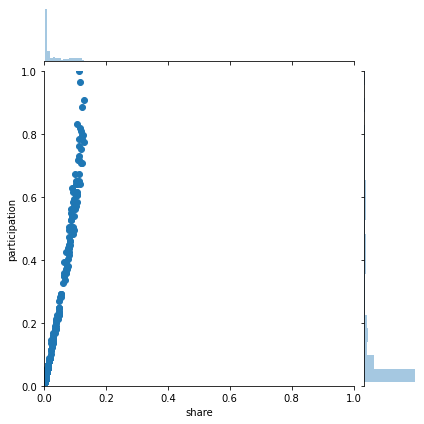

In [5]:
df_atp = analyze_data(ATP_SCORES)
#sns.scatterplot(df_nba["share"], df_nba["total"], size=)
#sns.distplot(df_atp["share"])

#plot = sns.jointplot(df_atp["share"], df_atp["total"])
plot = sns.jointplot(df_atp["share"], df_atp["participation"])
plot.ax_marg_x.set_xlim(0, 1)
plot.ax_marg_y.set_ylim(0, 1)

In [6]:
df_nba = analyze_data(NBA_SCORES)

#plot = sns.jointplot(df_nba["share"], df_nba["participation"])
df_nba.head()
#plot.ax_marg_x.set_xlim(0, 1)
#plot.ax_marg_y.set_ylim(0, 1)

,team,share,total,participation
0,5.0,1.0,65.0,0.955882
1,6.0,1.0,66.0,0.970588
2,10.0,1.0,66.0,0.970588
3,19.0,1.0,66.0,0.970588
4,30.0,1.0,66.0,0.970588


### Correr y levantar rankings reales resultantes

In [18]:
run(NBA_SCORES, TYPE_CMM)
run(NBA_SCORES, TYPE_WP)
nba_cmm = read_ranking(NBA_SCORES+TYPE_CMM+OUT)
nba_wp = read_ranking(NBA_SCORES+TYPE_WP+OUT)

running ../src/tp with input file ../data/nba_2016_scores.dat, type 0
running ../src/tp with input file ../data/nba_2016_scores.dat, type 1


In [8]:
#names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
#ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
#ranking.sort_values("rating")

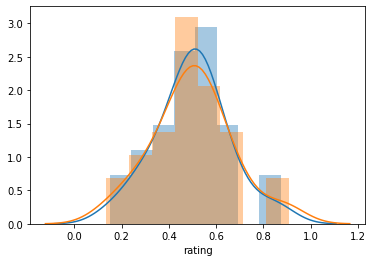

In [19]:
sns.distplot(nba_cmm["rating"])
sns.distplot(nba_wp["rating"])

running ../src/tp with input file ../data/atp_matches_2015.dat.norm, type 0
running ../src/tp with input file ../data/atp_matches_2015.dat.norm, type 1


(0.0, 1.5121070378033967)

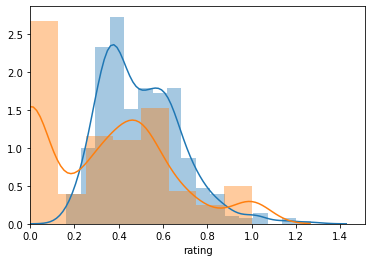

In [20]:
run(ATP_SCORES, TYPE_CMM)
run(ATP_SCORES, TYPE_WP)
atp_cmm = read_ranking(ATP_SCORES+TYPE_CMM+OUT)
atp_wp = read_ranking(ATP_SCORES+TYPE_WP+OUT)
sns.distplot(atp_cmm["rating"], label="pepe")
sns.distplot(atp_wp["rating"])
plt.xlim(0)

In [11]:
#names = pd.read_csv(NBA_TEAMS, sep=',', header=None, names=["idx", "name"])
#names.head()

# map https://stackoverflow.com/questions/59180942/pandas-mapping-one-column-values-using-other-dataframe-column
#ranking['names'] = (ranking.index + 1).map(names.set_index("idx")["name"])
#ranking.sort_values("rating")

## Justo

## Simulacion

### Generar datos

In [12]:
GOVEN = DATA_DIR + "goven.dat"
GOVEN_NEW = DATA_DIR + "goven_new.dat"

run(GOVEN, TYPE_CMM)
goven = read_ranking(GOVEN+TYPE_CMM+OUT)
goven.sort_values(["rating"], ascending=False)

running ../src/tp with input file ../data/goven.dat, type 0


,rating
2,0.666149
6,0.654947
1,0.579858
4,0.469610
5,0.464840
0,0.356477
3,0.308119


In [21]:
run(GOVEN_NEW, TYPE_CMM)
goven_new = read_ranking(GOVEN_NEW+TYPE_CMM+OUT)
goven_new.sort_values(["rating"], ascending=False)

running ../src/tp with input file ../data/goven_new.dat, type 0


,rating
6,0.663281
3,0.602590
1,0.602082
4,0.530726
5,0.489843
0,0.386110
2,0.225368
